你可以從
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)
訂購《Think Python 3e》的實體書和電子書版本。

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("已下載 " + str(local)) # 譯註：這裡顯示下載完成的檔案路徑
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# 迭代與搜尋

1939 年，歐尼斯特·文森·萊特 (Ernest Vincent Wright) 出版了一本五萬字的小說《蓋茲比》(Gadsby)，這本小說完全沒有使用字母 "e"。由於 "e" 是英文中最常見的字母，即使只寫幾個字而不使用它都很困難。
為了體會這有多困難，在本章中，我們將計算英文單字中至少包含一個 "e" 的比例。

為此，我們將使用 `for` 陳述句來遍歷字串中的字母和檔案中的單字，並且我們將在迴圈中更新變數來計算包含 "e" 的單字數量。
我們將使用 `in` 運算子來檢查一個字母是否存在於一個單字中，你也會學到一個稱為「線性搜尋」的程式設計模式。

作為練習，你將使用這些工具來解決一個名為「拼字蜜蜂」(Spelling Bee) 的文字謎題。

## 迴圈與字串

在第 3 章中，我們看過一個使用 `range` 函式的 `for` 迴圈來顯示一連串數字。

In [3]:
for i in range(3):
    print(i, end=' ')

0 1 2 

這個版本使用了關鍵字引數 `end`，所以 `print` 函式會在每個數字後面放一個空格，而不是換行符。

我們也可以使用 `for` 迴圈來顯示字串中的字母。

In [6]:
for letter in 'Gadsby':
    print(letter, end=' ')

G a d s b y 

注意我把變數名稱從 `i` 改成了 `letter`，這樣更能說明它所代表的值。
在 `for` 迴圈中定義的變數稱為 **迴圈變數** (loop variable)。

現在我們可以遍歷一個單字中的字母了，我們可以檢查它是否包含字母 "e"。

In [7]:
for letter in "Gadsby":
    if letter == 'E' or letter == 'e':
        print('這個字包含 "e"') # 譯註：將英文改為中文

在我們繼續之前，讓我們先把那個迴圈封裝到一個函式裡。

In [8]:
def has_e():
    for letter in "Gadsby":
        if letter == 'E' or letter == 'e':
            print('這個字包含 "e"') # 譯註：將英文改為中文

讓我們把它變成一個純函式，如果單字包含 "e" 就回傳 `True`，否則回傳 `False`。

In [9]:
def has_e():
    for letter in "Gadsby":
        if letter == 'E' or letter == 'e':
            return True
    return False

我們可以把它一般化，讓它接受單字作為參數。

In [10]:
def has_e(word):
    for letter in word:
        if letter == 'E' or letter == 'e':
            return True
    return False

現在我們可以像這樣測試它：

In [11]:
has_e('Gadsby')

False

In [12]:
has_e('Emma')

True

## 讀取單字列表

為了看看有多少單字包含 "e"，我們需要一個單字列表。
我們將使用的大約是 114,000 個官方填字遊戲單字的列表；也就是說，這些單字在填字遊戲和其他文字遊戲中被認為是有效的。

下面的儲存格會下載這個單字列表，它是 Grady Ward 收集並貢獻給公有領域的 Moby 詞彙專案（見 <http://wikipedia.org/wiki/Moby_Project>）列表的修改版本。

In [13]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

單字列表存放在一個名為 `words.txt` 的檔案中，這個檔案會在本章的筆記本中下載。
要讀取它，我們將使用內建函式 `open`，它接受檔案名稱作為參數，並回傳一個我們可以用来讀取檔案的 **檔案物件** (file object)。

In [15]:
file_object = open('words.txt')

檔案物件提供了一個名為 `readline` 的函式，它會從檔案中讀取字元，直到遇到換行符，然後將結果以字串形式回傳：

In [16]:
file_object.readline()

'aa\n'

注意，呼叫 `readline` 的語法與我們目前為止看到的函式不同。這是因為它是一個 **方法** (method)，也就是與物件相關聯的函式。
在這個例子中，`readline` 與檔案物件相關聯，所以我們使用物件的名稱、點運算子和方法的名稱來呼叫它。

列表中的第一個單字是 "aa"，是一種熔岩。
序列 `\n` 代表換行字元，它將這個單字與下一個單字分隔開。

檔案物件會記錄它在檔案中的位置，所以如果你再次呼叫
`readline`，你會得到下一個單字：

In [42]:
line = file_object.readline()
line

'abacus\n'

要移除單字末尾的換行符，我們可以使用 `strip`，這是一個與字串相關聯的方法，所以我們可以像這樣呼叫它。

In [43]:
word = line.strip()
word

'abacus'

`strip` 會移除字串開頭和結尾的空白字元——包括空格、定位字元和換行符。

你也可以將檔案物件用作 `for` 迴圈的一部分。
這個程式會讀取 `words.txt` 並印出每個單字，每行一個：

In [44]:
for line in open('words.txt'):
    word = line.strip()
    # print(word) # 譯註：如果執行，會印出很多單字，所以通常會註解掉這行來避免過多輸出

現在我們可以讀取單字列表了，下一步是計算它們的數量。
為此，我們將需要更新變數的能力。

## 更新變數

你可能已經發現，對同一個變數進行多次賦值是合法的。
新的賦值會使現有變數指向一個新的值（並停止指向舊的值）。

例如，這是一個建立變數的初始賦值。

In [45]:
x = 5
x

5

這是一個改變變數值的賦值。

In [46]:
x = 7
x

7

下圖顯示了這些賦值在狀態圖中的樣子。

In [47]:
from diagram import make_rebind, draw_bindings

bindings = make_rebind('x', [5, 7])

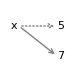

In [48]:
from diagram import diagram, adjust

width, height_val, x_pos, y_pos = [0.54, 0.61, 0.07, 0.45] # 譯註：變數名 height, x, y 修改
ax = diagram(width, height_val)
bbox = draw_bindings(bindings, ax, x_pos, y_pos)
# adjust(x_pos, y_pos, bbox)

虛線箭頭表示 `x` 不再指向 `5`。
實線箭頭表示它現在指向 `7`。

一種常見的賦值類型是 **更新** (update)，其中變數的新值
取決於舊值。

In [49]:
x = 7

In [50]:
x = x + 1
x

8

這個陳述句的意思是「取得 `x` 的目前值，加一，然後將結果重新賦值給 `x`。」

如果你試圖更新一個不存在的變數，你會得到一個錯誤，因為 Python 會在將值賦予左邊的變數之前，先評估右邊的運算式。

In [51]:
# %%expect NameError

# z = z + 1 # 譯註：如果 z 之前沒有被賦值，這行會產生 NameError

在更新變數之前，你必須先 **初始化** (initialize) 它，通常
用一個簡單的賦值：

In [52]:
z = 0
z = z + 1
z

1

增加變數的值稱為 **遞增** (increment)；減少變數的值稱為 **遞減** (decrement)。
由於這些運算非常常見，Python 提供了 **擴增賦值運算子** (augmented assignment operators)，可以更簡潔地更新變數。
例如，`+=` 運算子會將變數增加指定的量。

In [56]:
z += 2
z

9

其他算術運算子也有擴增賦值運算子，包括 `-=` 和 `*=`。

## 迴圈與計數

下面的程式計算單字列表中的單字數量。

In [57]:
total = 0

for line in open('words.txt'):
    word = line.strip()
    total += 1

它首先將 `total` 初始化為 `0`。
每次通過迴圈時，它會將 `total` 增加 `1`。
所以當迴圈結束時，`total` 指向單字的總數。

In [58]:
total

113809

像這樣用來計算某事發生次數的變數，稱為 **計數器** (counter)。

我們可以在程式中加入第二個計數器，來記錄包含 "e" 的單字數量。

In [59]:
total = 0
count = 0

for line in open('words.txt'):
    word = line.strip()
    total = total + 1
    if has_e(word): # 譯註：使用之前定義的 has_e 函式
        count += 1

讓我們看看有多少單字包含 "e"。

In [60]:
count

76168

以 `total` 的百分比來看，大約三分之二的單字使用了字母 "e"。

In [61]:
count / total * 100

66.92616576896378

所以你可以理解為什麼要寫一本不使用任何這類單字的書會這麼困難了。

## `in` 運算子

我們在本章中編寫的 `has_e` 版本比實際需要的更複雜。
Python 提供了一個運算子 `in`，它可以檢查一個字元是否存在於一個字串中。

In [62]:
word = 'Gadsby'
'e' in word

False

所以我們可以像這樣重寫 `has_e`。

In [63]:
def has_e(word):
    if 'E' in word or 'e' in word:
        return True
    else:
        return False

並且因為 `if` 陳述句的條件本身就是一個布林值，我們可以省略 `if` 陳述句，直接回傳布林值。

In [64]:
def has_e(word):
    return 'E' in word or 'e' in word

我們可以使用 `lower` 方法進一步簡化這個函式，`lower` 方法會將字串中的字母轉換為小寫。
這裡有一個例子。

In [65]:
word.lower()

'gadsby'

`lower` 會建立一個新的字串——它不會修改現有的字串——所以 `word` 的值保持不變。

In [66]:
word

'Gadsby'

這是我們如何在 `has_e` 中使用 `lower`。

In [67]:
def has_e(word):
    return 'e' in word.lower()

In [68]:
has_e('Gadsby')

False

In [69]:
has_e('Emma')

True

## 搜尋

基於這個更簡單的 `has_e` 版本，讓我們編寫一個更通用的函式，名為 `uses_any`，它接受第二個參數，該參數是一個字母字串。
如果單字使用了任何這些字母，則回傳 `True`，否則回傳 `False`。

In [70]:
def uses_any(word_param, letters_param): # 譯註：參數名修改
    for letter in word_param.lower():
        if letter in letters_param.lower():
            return True
    return False

這裡有一個結果為 `True` 的例子。

In [71]:
uses_any('banana', 'aeiou')

True

這是另一個結果為 `False` 的例子。

In [72]:
uses_any('apple', 'xyz')

False

`uses_any` 會將 `word_param` 和 `letters_param` 轉換為小寫，所以它適用於任何大小寫的組合。

In [73]:
uses_any('Banana', 'AEIOU')

True

`uses_any` 的結構與 `has_e` 相似。
它會遍歷 `word_param` 中的字母，並逐一檢查。
如果它找到一個出現在 `letters_param` 中的字母，它會立即回傳 `True`。
如果它遍歷完整個迴圈都沒有找到任何字母，它會回傳 `False`。

這種模式稱為 **線性搜尋** (linear search)。
在本章末尾的練習中，你將編寫更多使用這種模式的函式。

## 文件測試 (Doctest)

在[第 4 章](section_docstring)中，我們使用文件字串 (docstring) 來記錄函式——也就是解釋它做什麼。
也可以使用文件字串來*測試*函式。
這裡是一個包含測試的 `uses_any` 版本。

In [74]:
def uses_any(word_param, letters_param): # 譯註：參數名修改
    """檢查一個單字是否使用了字母列表中的任何一個字母。
    
    >>> uses_any('banana', 'aeiou')
    True
    >>> uses_any('apple', 'xyz')
    False
    """ # 譯註：以上為文件字串，包含說明和測試案例
    for letter in word_param.lower():
        if letter in letters_param.lower():
            return True
    return False

每個測試都以 `>>>` 開頭，這在某些 Python 環境中用作提示符，表示使用者可以在此處輸入程式碼。
在文件測試中，提示符後面跟著一個運算式，通常是一個函式呼叫。
下一行表示如果函式運作正常，該運算式應該具有的值。

在第一個例子中，`'banana'` 使用了 `'a'`，所以結果應該是 `True`。
在第二個例子中，`'apple'` 沒有使用任何 `'xyz'` 中的字母，所以結果應該是 `False`。

要執行這些測試，我們必須匯入 `doctest` 模組並執行一個名為 `run_docstring_examples` 的函式。
為了使這個函式更容易使用，我編寫了以下函式，它接受一個函式物件作為引數。

In [75]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

我們還沒有學過 `globals` 和 `__name__`——你可以忽略它們。
現在我們可以像這樣測試 `uses_any`。

In [79]:
run_doctests(uses_any)

`run_doctests` 會找到文件字串中的運算式並評估它們。
如果結果是預期的值，則測試 **通過** (passes)。
否則測試 **失敗** (fails)。

如果所有測試都通過，`run_doctests` 不會顯示任何輸出——在這種情況下，沒有消息就是好消息。
為了看看測試失敗時會發生什麼，這裡有一個不正確的 `uses_any` 版本。

In [90]:
def uses_any_incorrect(word_param, letters_param): # 譯註：參數名修改
    """檢查一個單字是否使用了字母列表中的任何一個字母。
    >>> uses_any_incorrect('banana', '123')
    False
    >>> uses_any_incorrect('banana', 'aeiou')
    True
    >>> uses_any_incorrect('apple', 'xyz')
    False
    """
    for letter in word_param.lower():
        if letter in letters_param.lower():
            return True
        else:
            return False     # 不正確！ (譯註：這會導致只要第一個字母不匹配就回傳 False)

這是我們測試它時發生的情況。

In [89]:
run_doctests(uses_any_incorrect)

輸出包括失敗的範例、函式預期產生的值，以及函式實際產生的值。

如果你不確定為什麼這個測試失敗了，你將有機會在練習中進行除錯。

## 詞彙表

**迴圈變數 (loop variable):**
在 `for` 迴圈標頭中定義的變數。

**檔案物件 (file object):**
代表一個已開啟檔案的物件，並記錄檔案的哪些部分已被讀取或寫入。

**方法 (method):**
 與物件相關聯並使用點運算子呼叫的函式。

**更新 (update):**
一種賦值陳述句，為已存在的變數賦予新值，而不是建立新變數。

**初始化 (initialize):**
建立一個新變數並賦予它一個值。

**遞增 (increment):**
增加變數的值。

**遞減 (decrement):**
減少變數的值。

**計數器 (counter):**
 一個用來計算某事物發生次數的變數，通常初始化為零然後遞增。

**線性搜尋 (linear search):**
一種計算模式，它搜尋一個元素序列，並在找到目標時停止。

**通過 (pass):**
如果一個測試執行並且結果符合預期，則測試通過。

**失敗 (fail):**
如果一個測試執行但結果不符合預期，則測試失敗。

## 練習

In [ ]:
# 這個儲存格告訴 Jupyter 在發生執行期錯誤時提供詳細的除錯資訊。
# 在做練習之前先執行它。

# %xmode Verbose

### 問問虛擬助理

在 `uses_any` 中，你可能已經注意到第一個 `return` 陳述句在迴圈內部，而第二個在外部。

In [ ]:
def uses_any(word_param, letters_param): # 譯註：參數名修改
    for letter in word_param.lower():
        if letter in letters_param.lower():
            return True
    return False

當人們第一次編寫這樣的函式時，一個常見的錯誤是將兩個 `return` 陳述句都放在迴圈內部，像這樣。

In [ ]:
def uses_any_incorrect(word_param, letters_param): # 譯註：參數名修改
    for letter in word_param.lower():
        if letter in letters_param.lower():
            return True
        else:
            return False     # 不正確！

問虛擬助理這個版本有什麼問題。

### 練習

編寫一個名為 `uses_none` 的函式，它接受一個單字和一個禁用字母字串，如果單字沒有使用任何禁用字母，則回傳 `True`。

這裡是一個包含兩個文件測試的函式大綱。
填寫函式使其通過這些測試，並至少再增加一個文件測試。

In [92]:
def uses_none(word_param, forbidden_param): # 譯註：參數名修改
    """檢查一個單字是否避開了禁用的字母。
    
    >>> uses_none('banana', 'xyz')
    True
    >>> uses_none('apple', 'efg')
    False
    """
    return None # 譯註：這是佔位符，需要你來完成

In [93]:
# 解答

def uses_none(word_param, forbidden_param): # 譯註：參數名修改
    """檢查一個單字是否避開了禁用的字母。
    
    >>> uses_none('banana', 'xyz')
    True
    >>> uses_none('apple', 'efg')
    False
    >>> uses_none('', 'abc') # 譯註：空字串不包含任何禁用字母
    True
    """
    for letter in word_param.lower():
        if letter in forbidden_param.lower():
            return False
    return True

In [94]:
run_doctests(uses_none)

### 練習

編寫一個名為 `uses_only` 的函式，它接受一個單字和一個字母字串，如果該單字只包含該字串中的字母，則回傳 `True`。

這裡是一個包含兩個文件測試的函式大綱。
填寫函式使其通過這些測試，並至少再增加一個文件測試。

In [95]:
def uses_only(word_param, available_param): # 譯註：參數名修改
    """檢查一個單字是否只使用了可用的字母。
    
    >>> uses_only('banana', 'ban')
    True
    >>> uses_only('apple', 'apl')
    False
    """
    return None # 譯註：這是佔位符

In [96]:
# 解答

def uses_only(word_param, available_param): # 譯註：參數名修改
    """檢查一個單字是否只使用了可用的字母。
    
    >>> uses_only('banana', 'ban')
    True
    >>> uses_only('ratatat', 'rate') # 譯註：'ratatat' 只用了 'r', 'a', 't'，都在 'rate' 裡
    True
    >>> uses_only('apple', 'apl')
    False
    """
    for letter in word_param.lower():
        if letter not in available_param.lower():
            return False
    return True

In [98]:
run_doctests(uses_only)

### 練習

編寫一個名為 `uses_all` 的函式，它接受一個單字和一個字母字串，如果該單字至少包含該字串中的所有字母一次，則回傳 `True`。

這裡是一個包含兩個文件測試的函式大綱。
填寫函式使其通過這些測試，並至少再增加一個文件測試。

In [99]:
def uses_all(word_param, required_param): # 譯註：參數名修改
    """檢查一個單字是否使用了所有必要的字母。
    
    >>> uses_all('banana', 'ban')
    True
    >>> uses_all('apple', 'api')
    False
    """
    return None # 譯註：這是佔位符

In [100]:
# 解答

def uses_all(word_param, required_param): # 譯註：參數名修改
    """檢查一個單字是否使用了所有必要的字母。
    
    >>> uses_all('banana', 'ban')
    True
    >>> uses_all('ratatat', 'rat')
    True
    >>> uses_all('apple', 'api') # 譯註：apple 沒有 'i'
    False
    """
    for letter in required_param.lower():
        if letter not in word_param.lower():
            return False
    return True

In [101]:
run_doctests(uses_all)

### 練習

《紐約時報》每天都會刊登一個名為「拼字蜜蜂」(Spelling Bee) 的謎題，挑戰讀者使用僅有的七個字母（其中一個字母是必需的）拼出盡可能多的單字。
這些單字必須至少有四個字母。

例如，在我寫這篇文章的那天，字母是 `ACDLORT`，其中 `R` 是必需字母。
所以 "color" 是一個可接受的單字，但 "told" 不是，因為它沒有使用 `R`，而 "rat" 不是，因為它只有三個字母。
字母可以重複使用，所以 "ratatat" 是可接受的。

編寫一個名為 `check_word` 的函式，檢查給定的單字是否可接受。
它應該接受要檢查的單字、一個包含七個可用字母的字串，以及一個包含單個必需字母的字串作為參數。
你可以使用你在前面練習中編寫的函式。

這裡是一個包含文件測試的函式大綱。
填寫函式，然後檢查所有測試是否通過。

In [102]:
def check_word(word_param, available_param, required_letter_param): # 譯註：參數名修改
    """檢查一個單字是否符合要求。
    
    >>> check_word('color', 'ACDLORT', 'R')
    True
    >>> check_word('ratatat', 'ACDLORT', 'R')
    True
    >>> check_word('rat', 'ACDLORT', 'R')
    False
    >>> check_word('told', 'ACDLORT', 'R')
    False
    >>> check_word('bee', 'ACDLORT', 'R')
    False
    """
    return False # 譯註：這是佔位符

In [ ]:
# 解答

def check_word(word_param, available_param, required_letter_param): # 譯註：參數名修改
    """檢查一個單字是否符合要求。
    
    >>> check_word('color', 'ACDLORT', 'R')
    True
    >>> check_word('ratatat', 'ACDLORT', 'R')
    True
    >>> check_word('rat', 'ACDLORT', 'R') # 譯註：長度小於4
    False
    >>> check_word('told', 'ACDLORT', 'R') # 譯註：沒有必需字母 R
    False
    >>> check_word('bee', 'ACDLORT', 'R') # 譯註：字母 b, e 不在 available_param 中
    False
    """ # 譯註：上面 bee 的 doctest 原本應該是 False，因為 'e' 不在 'ACDLORT' 中。
      # 如果 available_param 包含 'e' 且 required_letter_param 是 'e'，則 bee 可能通過。
      # 這裡假設 available_param 是固定的 'ACDLORT'。
      # 根據 Spelling Bee 規則，單字必須只使用 available_param 中的字母。
    if len(word_param) < 4:
        return False
    
    if not uses_all(word_param, required_letter_param): # 檢查是否包含必需字母
        return False
    
    return uses_only(word_param, available_param) # 檢查是否只使用可用字母

In [ ]:
run_doctests(check_word)

根據「拼字蜜蜂」的規則：

*   四個字母的單字每個值 1 分。

*   更長的單字每個字母值 1 分。

*   每個謎題至少包含一個使用了所有字母的「全字母詞」(pangram)。這些詞額外值 7 分！

編寫一個名為 `word_score` 的函式，它接受一個單字和一個可用字母字串，並回傳其分數。
你可以假設該單字是可接受的。

同樣，這裡是一個帶有文件測試的函式大綱。

In [ ]:
def word_score(word_param, available_param): # 譯註：參數名修改
    """計算一個符合要求的單字的分數。
    
    >>> word_score('card', 'ACDLORT')
    1
    >>> word_score('color', 'ACDLORT')
    5
    >>> word_score('cartload', 'ACDLORT') # 譯註：cartload (8個字母) 使用了所有 ACDLORT (7個字母)，所以是 8 + 7 = 15
    15
    """
    return 0 # 譯註：這是佔位符

In [103]:
# 解答

def word_score(word_param, available_param): # 譯註：參數名修改
    """計算一個符合要求的單字的分數。
    
    >>> word_score('card', 'ACDLORT')
    1
    >>> word_score('color', 'ACDLORT')
    5
    >>> word_score('cartload', 'ACDLORT')
    15
    """
    n = len(word_param)
    if n == 4:
        score = 1
    else:
        score = n
    
    if uses_all(word_param, available_param): # 檢查是否為全字母詞
        score += 7
        
    return score

In [104]:
run_doctests(word_score)

當你所有的函式都通過測試後，使用下面的迴圈來搜尋單字列表，找出可接受的單字並加總它們的分數。

In [105]:
available_letters = 'ACDLORT' # 譯註：變數名修改
required_letter = 'R' # 譯註：變數名修改

total_score = 0 # 譯註：變數名修改

file_object = open('words.txt')
for line in file_object:
    word_from_file = line.strip() # 譯註：變數名修改   
    if check_word(word_from_file, available_letters, required_letter):
        score_val = word_score(word_from_file, available_letters) # 譯註：變數名修改
        total_score = total_score + score_val
        # print(word_from_file, score_val) # 譯註：如果執行，會印出很多，通常測試時註解掉
        
print("總分", total_score) # 譯註：將英文改為中文

總分 0


請造訪《紐約時報》的「拼字蜜蜂」頁面 <https://www.nytimes.com/puzzles/spelling-bee>，然後輸入當天的可用字母。中間的字母是必需的。

我找到了一組字母，它們拼出的單字總分是 5820。你能超過這個分數嗎？找到最好的字母組合可能太難了——你必須現實一點。

### 練習

你可能已經注意到，你在前面練習中編寫的函式有很多共同點。
事實上，它們非常相似，你通常可以用一個函式來編寫另一個函式。

例如，如果一個單字沒有使用一組禁用字母中的任何一個，那意味著它一個都沒有使用。所以我們可以像這樣編寫一個 `uses_none` 的版本。

In [107]:
def uses_none(word_param, forbidden_param): # 譯註：參數名修改
    """檢查一個單字是否避開了禁用的字母。
    
    >>> uses_none('banana', 'xyz')
    True
    >>> uses_none('apple', 'efg')
    False
    >>> uses_none('', 'abc')
    True
    """
    return not uses_any(word_param, forbidden_param) # 譯註：利用 uses_any

In [ ]:
run_doctests(uses_none)

`uses_only` 和 `uses_all` 之間也有一個相似之處，你可以利用它。
如果你有一個可運作的 `uses_only` 版本，看看你是否能編寫一個呼叫 `uses_only` 的 `uses_all` 版本。

### 練習

如果你被上一個問題卡住了，試著問虛擬助理：「給定一個函式 `uses_only`，它接受兩個字串並檢查第一個字串是否只使用了第二個字串中的字母，請用它來編寫 `uses_all`，它接受兩個字串並檢查第一個字串是否使用了第二個字串中的所有字母，允許重複。」

使用 `run_doctests` 來檢查答案。

In [108]:
# 解答

# 如果 A 使用了 B 中的所有字母，那麼 B 只使用了 A 中的字母。
# 譯註：這個邏輯是正確的：如果 word (A) 使用了 required (B) 中的所有字母，
# 則 required (B) 中的每個字母都必須出現在 word (A) 中，
# 換句話說，required (B) 只使用了 word (A) 中的字母。

def uses_all(word_param, required_param): # 譯註：參數名修改
    """檢查一個單字是否使用了所有必要的字母。
    
    >>> uses_all('banana', 'ban')
    True
    >>> uses_all('ratatat', 'rat')
    True
    >>> uses_all('apple', 'api')
    False
    """
    return uses_only(required_param, word_param) # 譯註：巧妙的轉換！

In [ ]:
run_doctests(uses_all)

### 練習

現在讓我們看看是否能根據 `uses_any` 來編寫 `uses_all`。

問虛擬助理：「給定一個函式 `uses_any`，它接受兩個字串並檢查第一個字串是否使用了第二個字串中的任何字母，你能用它來編寫 `uses_all`，它接受兩個字串並檢查第一個字串是否使用了第二個字串中的所有字母，允許重複嗎？」

如果它說可以，一定要測試結果！

In [ ]:
# 解答

# 這是作者從 ChatGPT 2023年5月24日版本得到的結果
# https://help.openai.com/en/articles/6825453-chatgpt-release-notes

# 這是不正確的
# 譯註：uses_any(letters, word) 檢查 letters 中的任一字母是否在 word 中。
# not uses_any(letters, word) 檢查 letters 中的所有字母都不在 word 中。
# 這與 uses_all 的定義（word 使用了 letters 中的所有字母）不同。
def uses_all_incorrect_from_any(word_param, letters_param): # 譯註：函式名修改以區別，並標示不正確
    """(不正確的版本) 檢查一個單字是否使用了所有必要的字母。
    
    >>> uses_all_incorrect_from_any('banana', 'ban') 
    True 
    >>> uses_all_incorrect_from_any('ratatat', 'rat')
    True
    >>> uses_all_incorrect_from_any('apple', 'api') 
    False
    """ # 譯註：即使 doctest 可能通過，邏輯也是錯誤的
    return not uses_any(letters_param, word_param)

In [ ]:
# 這是作者從 ChatGPT 4o 2024年12月26日得到的結果
# 這是正確的，但它多次呼叫 uses_any
# 譯註：這個邏輯是正確的：遍歷 required_param (s2) 中的每個字元，
# 如果 s1 (word_param) 沒有使用 (uses_any 返回 False) 任何一個 char，
# 那麼 s1 就沒有使用 s2 中的所有字元，所以返回 False。
# 如果迴圈完成，表示 s1 使用了 s2 中的所有字元。
def uses_all_correct_from_any(s1, s2): # 譯註：函式名修改，參數名沿用原文
    """檢查 s2 中的所有字元是否都在 s1 中，允許重複。"""
    for char_val in s2: # 譯註：變數名修改
        if not uses_any(s1, char_val):
            return False
    return True



In [ ]:
# 解答
# 譯註：測試的是 uses_all_correct_from_any
# 我們需要為 uses_all_correct_from_any 加上 doctests 才能用 run_doctests
# 或者直接呼叫測試
print(f"測試 uses_all_correct_from_any('banana', 'ban'): {uses_all_correct_from_any('banana', 'ban')}") # 預期 True
print(f"測試 uses_all_correct_from_any('ratatat', 'rat'): {uses_all_correct_from_any('ratatat', 'rat')}") # 預期 True
print(f"測試 uses_all_correct_from_any('apple', 'api'): {uses_all_correct_from_any('apple', 'api')}")   # 預期 False
print(f"測試 uses_all_correct_from_any('apple', 'aple'): {uses_all_correct_from_any('apple', 'aple')}") # 預期 True

# run_doctests(uses_all_correct_from_any) # 譯註：如果 uses_all_correct_from_any 有 doctests 則可執行

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

程式碼授權: [MIT License](https://mit-license.org/)

文字授權: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)